In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn.metrics import pairwise_distances
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bhaktande Kramik Pustak Dataset - Bhaktande.csv')

In [ ]:
df.head()

Composition_name  Sa(dot below)  Re1(dot below)  Re(dot below)  \
0  Khamaj_01_123.csv              0               0              0   
1  Khamaj_02_124.csv              0               0              0   
2  Khamaj_03_125.csv              0               0              0   
3  Khamaj_04_126.csv              0               0              0   
4  Khamaj_05_127.csv              0               0              0   

   Ga1(dot below)  Ga(dot below)  Ma(dot below)  Ma2(dot below)  \
0               0              0              0               0   
1               0              0              0               0   
2               0              0              0               0   
3               0              0              0               0   
4               0              0              0               0   

   Pa(dot below)  Dha1(dot below)  ...  Ga1(dot above)  Ga(dot above)  \
0              0                0  ...               0              3   
1              0                0  ...               0              5   
2              0                0  ...               0              0   
3              0                0  ...               0              0   
4              0                0  ...               0              2   

   Ma(dot above)  Ma2(dot above)  Pa(dot above)  Dha1(dot above)  \
0              3               0              0                0   
1              4               0              1                0   
2              0               0              0                0   
3              0               0              0                0   
4              0               0              0                0   

   Dha(dot above)  Ni1(dot above)  Ni(dot above)    Raag  
0               0               0              0  khamaj  
1               0               0              0  khamaj  
2               0               0              0  khamaj  
3               0               0              0  khamaj  
4               0               0              0  khamaj  

[5 rows x 38 columns]

### **Frequency Distribution for Khamaj**

In [ ]:
df_kha=df[df['Raag'] == 'khamaj']

In [ ]:
df_kha.head()

Composition_name  Sa(dot below)  Re1(dot below)  Re(dot below)  \
0  Khamaj_01_123.csv              0               0              0   
1  Khamaj_02_124.csv              0               0              0   
2  Khamaj_03_125.csv              0               0              0   
3  Khamaj_04_126.csv              0               0              0   
4  Khamaj_05_127.csv              0               0              0   

   Ga1(dot below)  Ga(dot below)  Ma(dot below)  Ma2(dot below)  \
0               0              0              0               0   
1               0              0              0               0   
2               0              0              0               0   
3               0              0              0               0   
4               0              0              0               0   

   Pa(dot below)  Dha1(dot below)  ...  Ga1(dot above)  Ga(dot above)  \
0              0                0  ...               0              3   
1              0                0  ...               0              5   
2              0                0  ...               0              0   
3              0                0  ...               0              0   
4              0                0  ...               0              2   

   Ma(dot above)  Ma2(dot above)  Pa(dot above)  Dha1(dot above)  \
0              3               0              0                0   
1              4               0              1                0   
2              0               0              0                0   
3              0               0              0                0   
4              0               0              0                0   

   Dha(dot above)  Ni1(dot above)  Ni(dot above)    Raag  
0               0               0              0  khamaj  
1               0               0              0  khamaj  
2               0               0              0  khamaj  
3               0               0              0  khamaj  
4               0               0              0  khamaj  

[5 rows x 38 columns]

In [ ]:
df_kha = df_kha.drop(columns = ['Composition_name','Raag'])

In [ ]:
df_kha['Sa'] = df_kha['Sa(dot below)']+df_kha['Sa(no dot)'] + df_kha['Sa(dot above)']
df_kha['Re1'] = df_kha['Re1(dot below)']+df_kha['Re1(no dot)'] + df_kha['Re1(dot above)']
df_kha['Re'] = df_kha['Re(dot below)']+df_kha['Re(no dot)'] + df_kha['Re(dot above)']
df_kha['Ga1'] = df_kha['Ga1(dot below)']+df_kha['Ga1(no dot)'] + df_kha['Ga1(dot above)']
df_kha['Ga'] = df_kha['Ga(dot below)']+df_kha['Ga(no dot)'] + df_kha['Ga(dot above)']
df_kha['Ma'] = df_kha['Ma(dot below)']+df_kha['Ma(no dot)'] + df_kha['Ma(dot above)']
df_kha['Ma2'] = df_kha['Ma2(dot below)']+df_kha['Ma2(no dot)'] + df_kha['Ma2(dot above)']
df_kha['Pa'] = df_kha['Pa(dot below)']+df_kha['Pa(no dot)'] + df_kha['Pa(dot above)']
df_kha['Dha1'] = df_kha['Dha1(dot below)']+df_kha['Dha1(no dot)'] + df_kha['Dha1(dot above)']
df_kha['Dha'] = df_kha['Dha(dot below)']+df_kha['Dha(no dot)'] + df_kha['Dha(dot above)']
df_kha['Ni1'] = df_kha['Ni1(dot below)']+df_kha['Ni1(no dot)'] + df_kha['Ni1(dot above)']
df_kha['Ni'] = df_kha['Ni(dot below)']+df_kha['Ni(no dot)'] + df_kha['Ni(dot above)']

In [ ]:
df_kha.head()

Sa(dot below)  Re1(dot below)  Re(dot below)  Ga1(dot below)  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   Ga(dot below)  Ma(dot below)  Ma2(dot below)  Pa(dot below)  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   Dha1(dot below)  Dha(dot below)  ...  Re  Ga1  Ga  Ma  Ma2  Pa  Dha1  Dha  \
0                0               0  ...   8    0  12  15    0   8     0    8   
1                0               0  ...   3    0  10  14    0   5     0   16   
2                0               0  ...   1    0   7   9    0  10     0    9   
3                0               0  ...   1    0  12  12    0  13     0   14   
4                0               0  ...   1    0  10   8    0  10     0    7   

   Ni1  Ni  
0    4   7  
1    8   3  
2    6  13  
3    8   4  
4    7   9  

[5 rows x 48 columns]

In [ ]:
df_kha = df_kha.drop(df_kha.iloc[:,0:36],axis = 1)

In [ ]:
df_kha.head()

Sa  Re1  Re  Ga1  Ga  Ma  Ma2  Pa  Dha1  Dha  Ni1  Ni
0  14    0   8    0  12  15    0   8     0    8    4   7
1  15    0   3    0  10  14    0   5     0   16    8   3
2  21    0   1    0   7   9    0  10     0    9    6  13
3  13    0   1    0  12  12    0  13     0   14    8   4
4  21    0   1    0  10   8    0  10     0    7    7   9

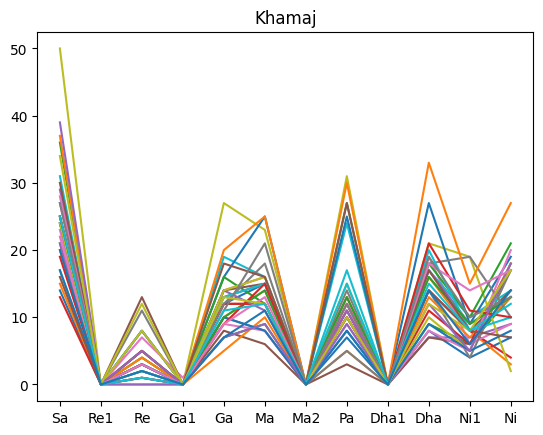

In [ ]:
bars = ['Sa','Re1','Re','Ga1','Ga','Ma','Ma2','Pa','Dha1','Dha','Ni1','Ni']
plt.xticks(range(len(bars)), bars)
plt.title('Khamaj')
for i in range(len(df_kha)):
  plt.plot(df_kha.iloc[i])

### **Cosine Similarity for Khamaj**

In [ ]:
cosine_matrix_kha = cosine_similarity(df_kha)

In [ ]:
cosine_sim_df_kha = pd.DataFrame(cosine_matrix_kha, index=df_kha.index, columns=df_kha.index)

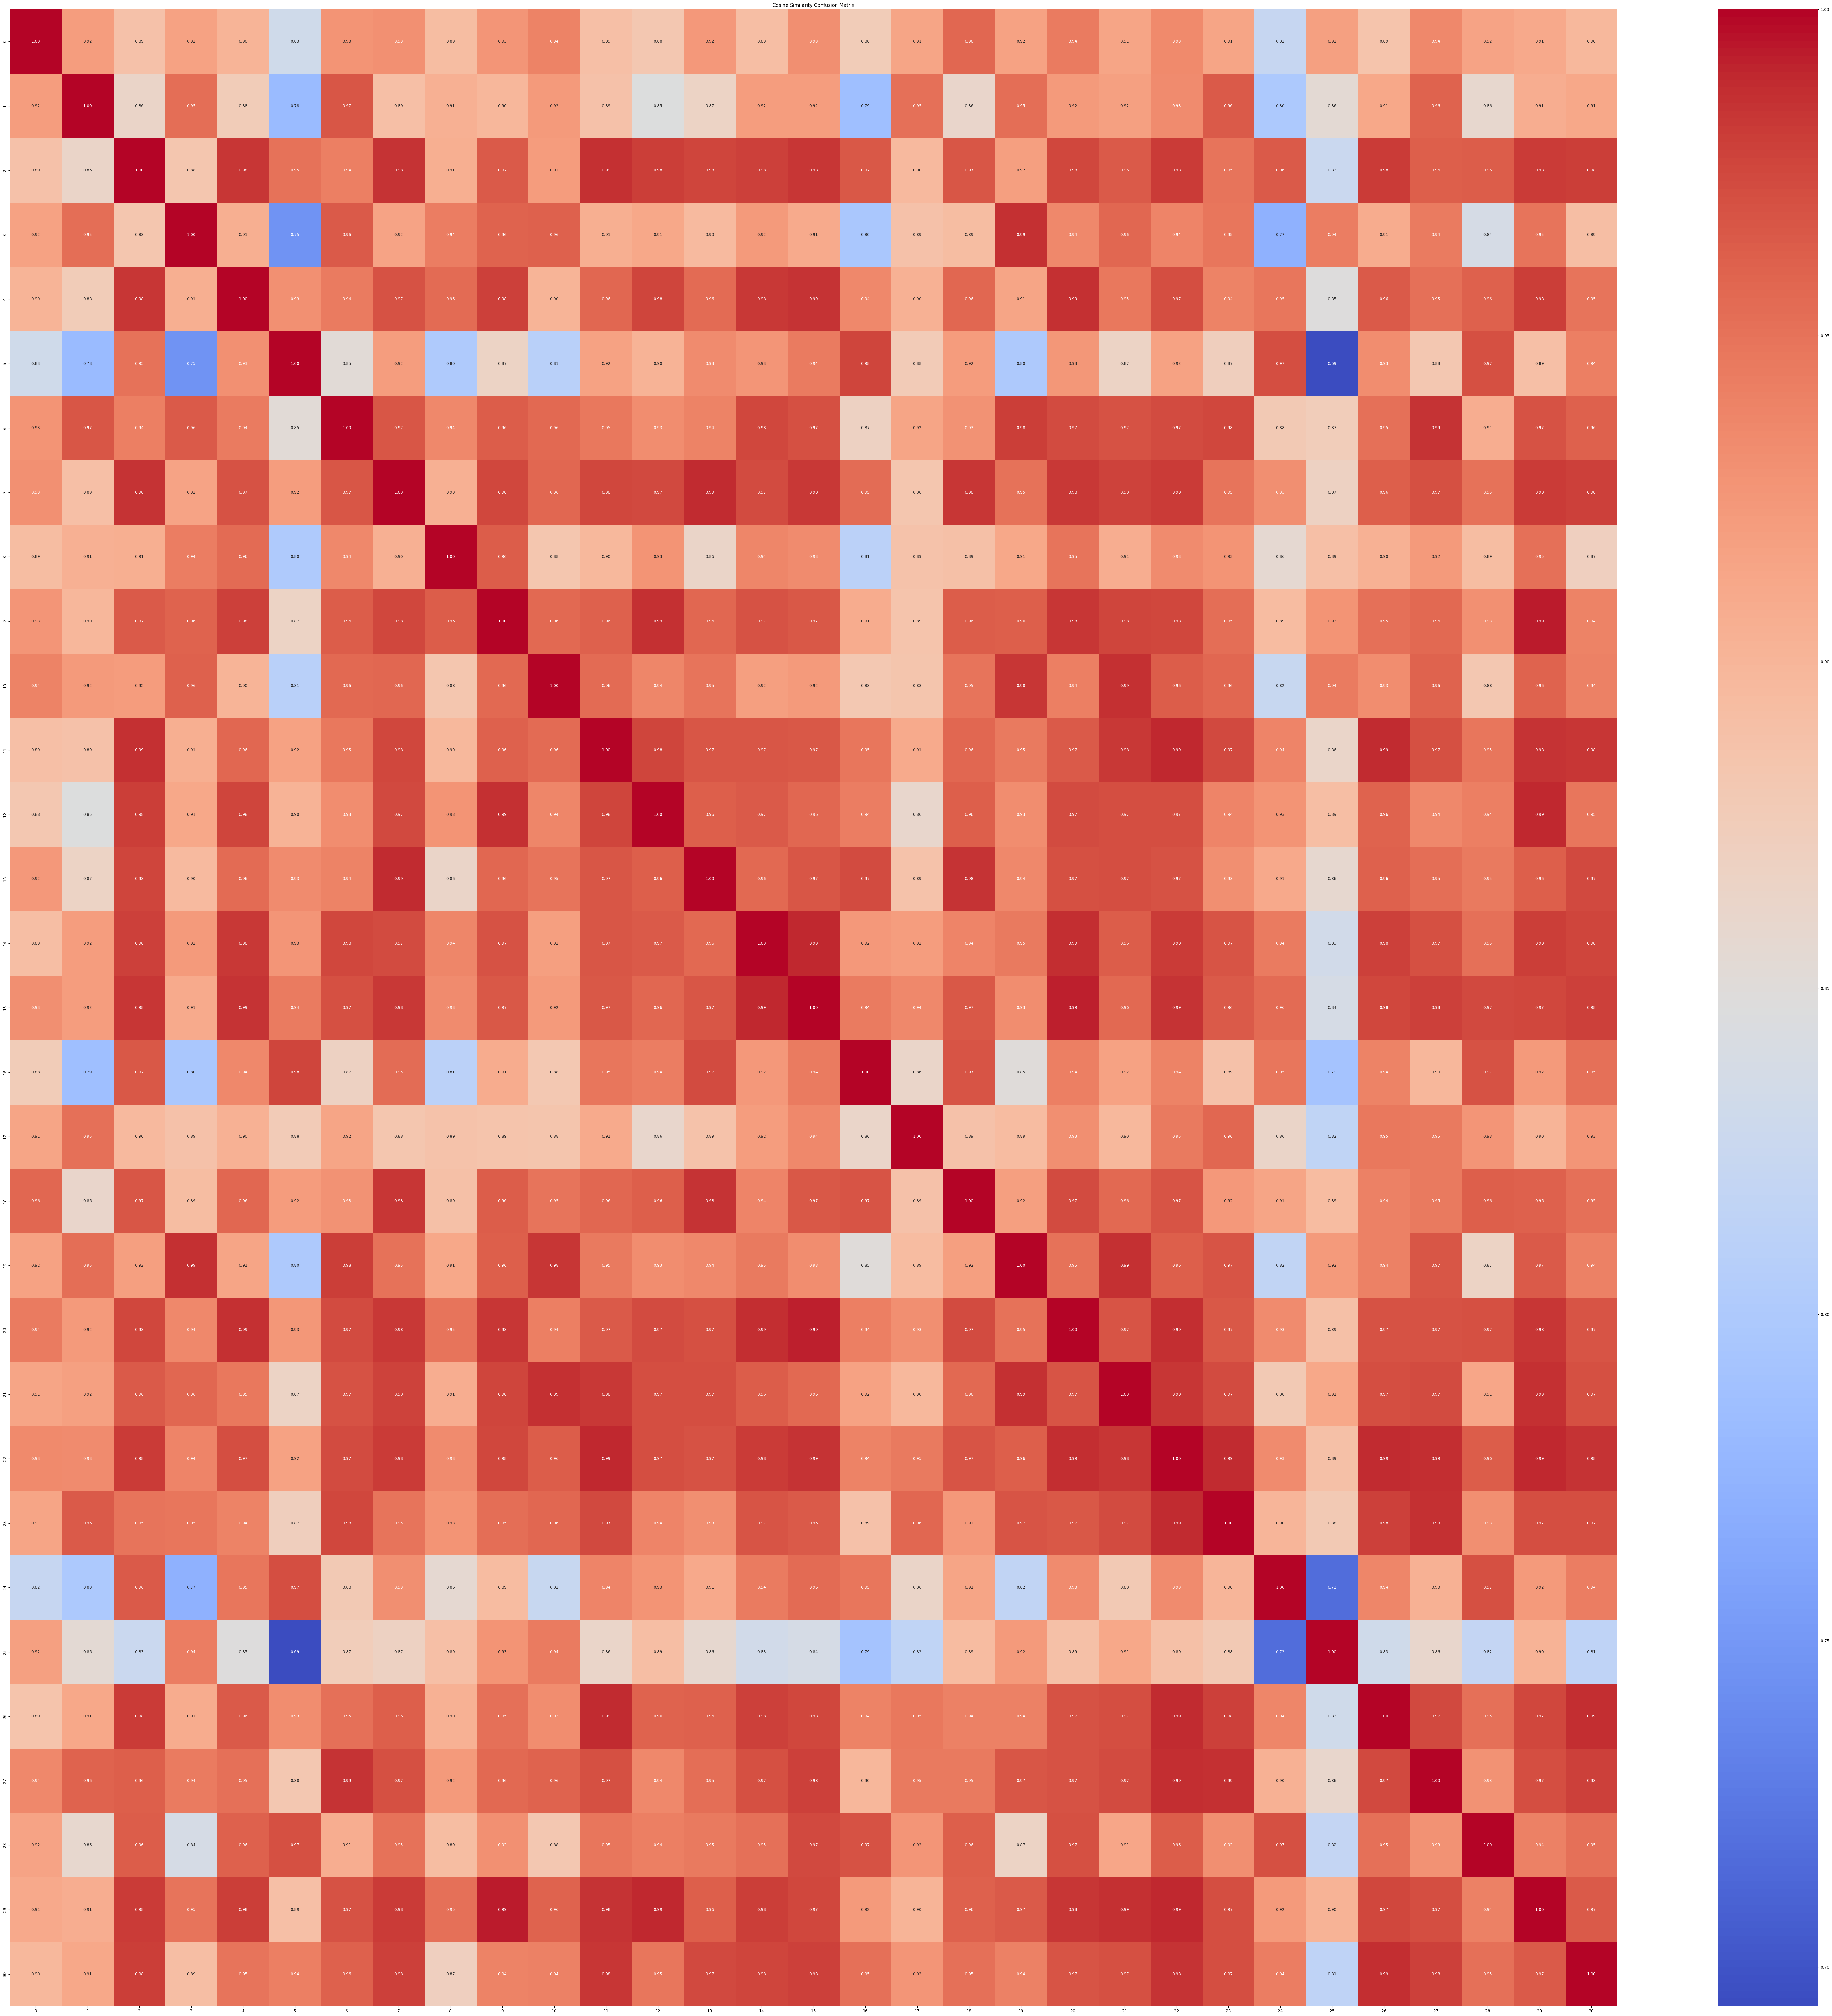

In [ ]:
plt.figure(figsize=(90, 90))
sns.heatmap(cosine_sim_df_kha, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cosine Similarity Confusion Matrix')
plt.show()

In [ ]:
print(cosine_sim_df_kha)

          0         1         2         3         4         5         6   \
0   1.000000  0.920890  0.887989  0.916953  0.901610  0.831609  0.927493   
1   0.920890  1.000000  0.863890  0.952488  0.876201  0.781485  0.967145   
2   0.887989  0.863890  1.000000  0.883782  0.983952  0.950881  0.942046   
3   0.916953  0.952488  0.883782  1.000000  0.906086  0.745930  0.964451   
4   0.901610  0.876201  0.983952  0.906086  1.000000  0.930105  0.944611   
5   0.831609  0.781485  0.950881  0.745930  0.930105  1.000000  0.851984   
6   0.927493  0.967145  0.942046  0.964451  0.944611  0.851984  1.000000   
7   0.930154  0.890455  0.984691  0.915540  0.969383  0.920569  0.966931   
8   0.893554  0.905025  0.906696  0.943735  0.955542  0.800553  0.935499   
9   0.926179  0.899526  0.965163  0.959842  0.979172  0.866779  0.963667   
10  0.939903  0.922695  0.921684  0.960894  0.901746  0.809508  0.956191   
11  0.890296  0.888395  0.986056  0.906532  0.957936  0.916741  0.946662   
12  0.882624

### **Eucledian Distance in Khamaj**



In [ ]:
indices = df_kha.index
distance_matrix = pairwise_distances(df_kha.values, metric='euclidean')
distance_df = pd.DataFrame(distance_matrix, index=indices, columns=indices)
print(distance_df)

           0          1          2          3          4          5   \
0    0.000000  11.661904  14.282857  12.041595  13.000000  18.330303   
1   11.661904   0.000000  15.874508   9.219544  14.798649  20.928450   
2   14.282857  15.874508   0.000000  14.730920   5.567764  10.198039   
3   12.041595   9.219544  14.730920   0.000000  12.961481  22.605309   
4   13.000000  14.798649   5.567764  12.961481   0.000000  12.124356   
5   18.330303  20.928450  10.198039  22.605309  12.124356   0.000000   
6   16.970563  13.341664  14.832397  13.379088  15.198684  20.832667   
7   18.165902  20.199010  12.247449  18.466185  14.594520  17.029386   
8   50.487622  49.183331  48.176758  47.138095  46.840154  51.971146   
9   28.035692  28.774989  23.958297  25.039968  24.062419  28.982753   
10  32.171416  32.264532  31.448370  29.899833  33.346664  36.482873   
11  14.866069  15.000000   5.567764  13.784049   9.486833  13.379088   
12  34.899857  36.027767  27.820855  32.542280  29.137605  31.20

### **Frequency Distribution of Bhairavi**

In [ ]:
df_bha=df[df['Raag'] == 'Bhairavi']

In [ ]:
df_bha.head()

Composition_name  Sa(dot below)  Re1(dot below)  Re(dot below)  \
64  Bhairavi_01_392.csv              0               0              0   
65  Bhairavi_02_392.csv              0               0              0   
66  Bhairavi_03_394.csv              0               0              0   
67  Bhairavi_04_394.csv              0               0              0   
68  Bhairavi_05_395.csv              0               0              0   

    Ga1(dot below)  Ga(dot below)  Ma(dot below)  Ma2(dot below)  \
64               0              0              1               0   
65               0              0              0               0   
66               0              0              0               0   
67               0              0              0               0   
68               0              0              0               0   

    Pa(dot below)  Dha1(dot below)  ...  Ga1(dot above)  Ga(dot above)  \
64              0                2  ...               3              0   
65              0                3  ...               2              0   
66              0                1  ...               0              0   
67              0                0  ...               3              0   
68              0                1  ...               1              0   

    Ma(dot above)  Ma2(dot above)  Pa(dot above)  Dha1(dot above)  \
64              1               0              0                0   
65              0               0              0                0   
66              0               0              0                0   
67              0               0              0                0   
68              0               0              0                0   

    Dha(dot above)  Ni1(dot above)  Ni(dot above)      Raag  
64               0               0              0  Bhairavi  
65               0               0              0  Bhairavi  
66               0               0              0  Bhairavi  
67               0               0              0  Bhairavi  
68               0               0              0  Bhairavi  

[5 rows x 38 columns]

In [ ]:
df_bha = df_bha.drop(columns = ['Composition_name','Raag'])

In [ ]:
df_bha['Sa'] = df_bha['Sa(dot below)']+df_bha['Sa(no dot)'] + df_bha['Sa(dot above)']
df_bha['Re1'] = df_bha['Re1(dot below)']+df_bha['Re1(no dot)'] + df_bha['Re1(dot above)']
df_bha['Re'] = df_bha['Re(dot below)']+df_bha['Re(no dot)'] + df_bha['Re(dot above)']
df_bha['Ga1'] = df_bha['Ga1(dot below)']+df_bha['Ga1(no dot)'] + df_bha['Ga1(dot above)']
df_bha['Ga'] = df_bha['Ga(dot below)']+df_bha['Ga(no dot)'] + df_bha['Ga(dot above)']
df_bha['Ma'] = df_bha['Ma(dot below)']+df_bha['Ma(no dot)'] + df_bha['Ma(dot above)']
df_bha['Ma2'] = df_bha['Ma2(dot below)']+df_bha['Ma2(no dot)'] + df_bha['Ma2(dot above)']
df_bha['Pa'] = df_bha['Pa(dot below)']+df_bha['Pa(no dot)'] + df_bha['Pa(dot above)']
df_bha['Dha1'] = df_bha['Dha1(dot below)']+df_bha['Dha1(no dot)'] + df_bha['Dha1(dot above)']
df_bha['Dha'] = df_bha['Dha(dot below)']+df_bha['Dha(no dot)'] + df_bha['Dha(dot above)']
df_bha['Ni1'] = df_bha['Ni1(dot below)']+df_bha['Ni1(no dot)'] + df_bha['Ni1(dot above)']
df_bha['Ni'] = df_bha['Ni(dot below)']+df_bha['Ni(no dot)'] + df_bha['Ni(dot above)']

In [ ]:
df_bha = df_bha.drop(df_bha.iloc[:,0:36],axis = 1)

In [ ]:
df_bha.head()

Sa  Re1  Re  Ga1  Ga  Ma  Ma2  Pa  Dha1  Dha  Ni1  Ni
64  12    7   0   12   0  13    0   5    16    0   17   0
65  26    5   4    7   0   7    0  13    23    0   19   0
66  16    6   0    8   0   9    0   6     7    0    7   0
67  12    6   4   12   0  12    0  13     0    0    5   0
68  20    9   5   12   0  11    0   3     7    0   12   0

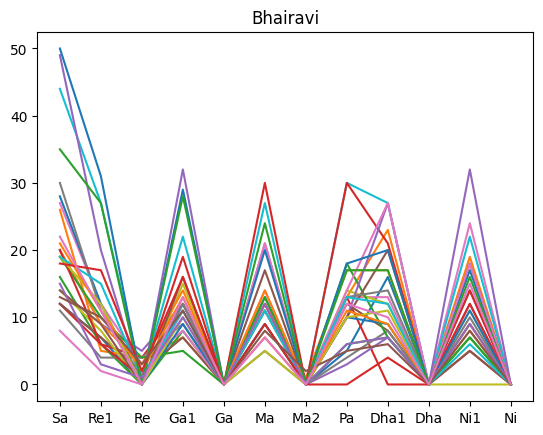

In [ ]:
bars = ['Sa','Re1','Re','Ga1','Ga','Ma','Ma2','Pa','Dha1','Dha','Ni1','Ni']
plt.xticks(range(len(bars)), bars)
plt.title('Bhairavi')
for i in range(len(df_bha)):
  plt.plot(df_bha.iloc[i])

### **Cosine Similarity for Bhairavi**

In [ ]:
cosine_matrix_bha = cosine_similarity(df_bha)

In [ ]:
cosine_sim_df_bha = pd.DataFrame(cosine_matrix_bha, index=df_bha.index, columns=df_bha.index)

In [ ]:
print(cosine_sim_df_bha)

          64        65        66        67        68        69        70  \
64  1.000000  0.899995  0.903252  0.744622  0.900113  0.862292  0.919075   
65  0.899995  1.000000  0.905809  0.700854  0.869415  0.854226  0.943506   
66  0.903252  0.905809  1.000000  0.875918  0.965958  0.940591  0.951544   
67  0.744622  0.700854  0.875918  1.000000  0.848297  0.927809  0.813949   
68  0.900113  0.869415  0.965958  0.848297  1.000000  0.874675  0.941044   
69  0.862292  0.854226  0.940591  0.927809  0.874675  1.000000  0.899481   
70  0.919075  0.943506  0.951544  0.813949  0.941044  0.899481  1.000000   
71  0.947202  0.932724  0.932753  0.810168  0.959354  0.866207  0.942061   
72  0.929546  0.886103  0.942926  0.899424  0.894087  0.956684  0.911465   
73  0.901081  0.911676  0.977450  0.884111  0.924383  0.974587  0.951018   
74  0.822465  0.893360  0.977658  0.834533  0.938140  0.902190  0.936274   
75  0.889632  0.916672  0.949727  0.879575  0.887088  0.971861  0.902741   
76  0.781951

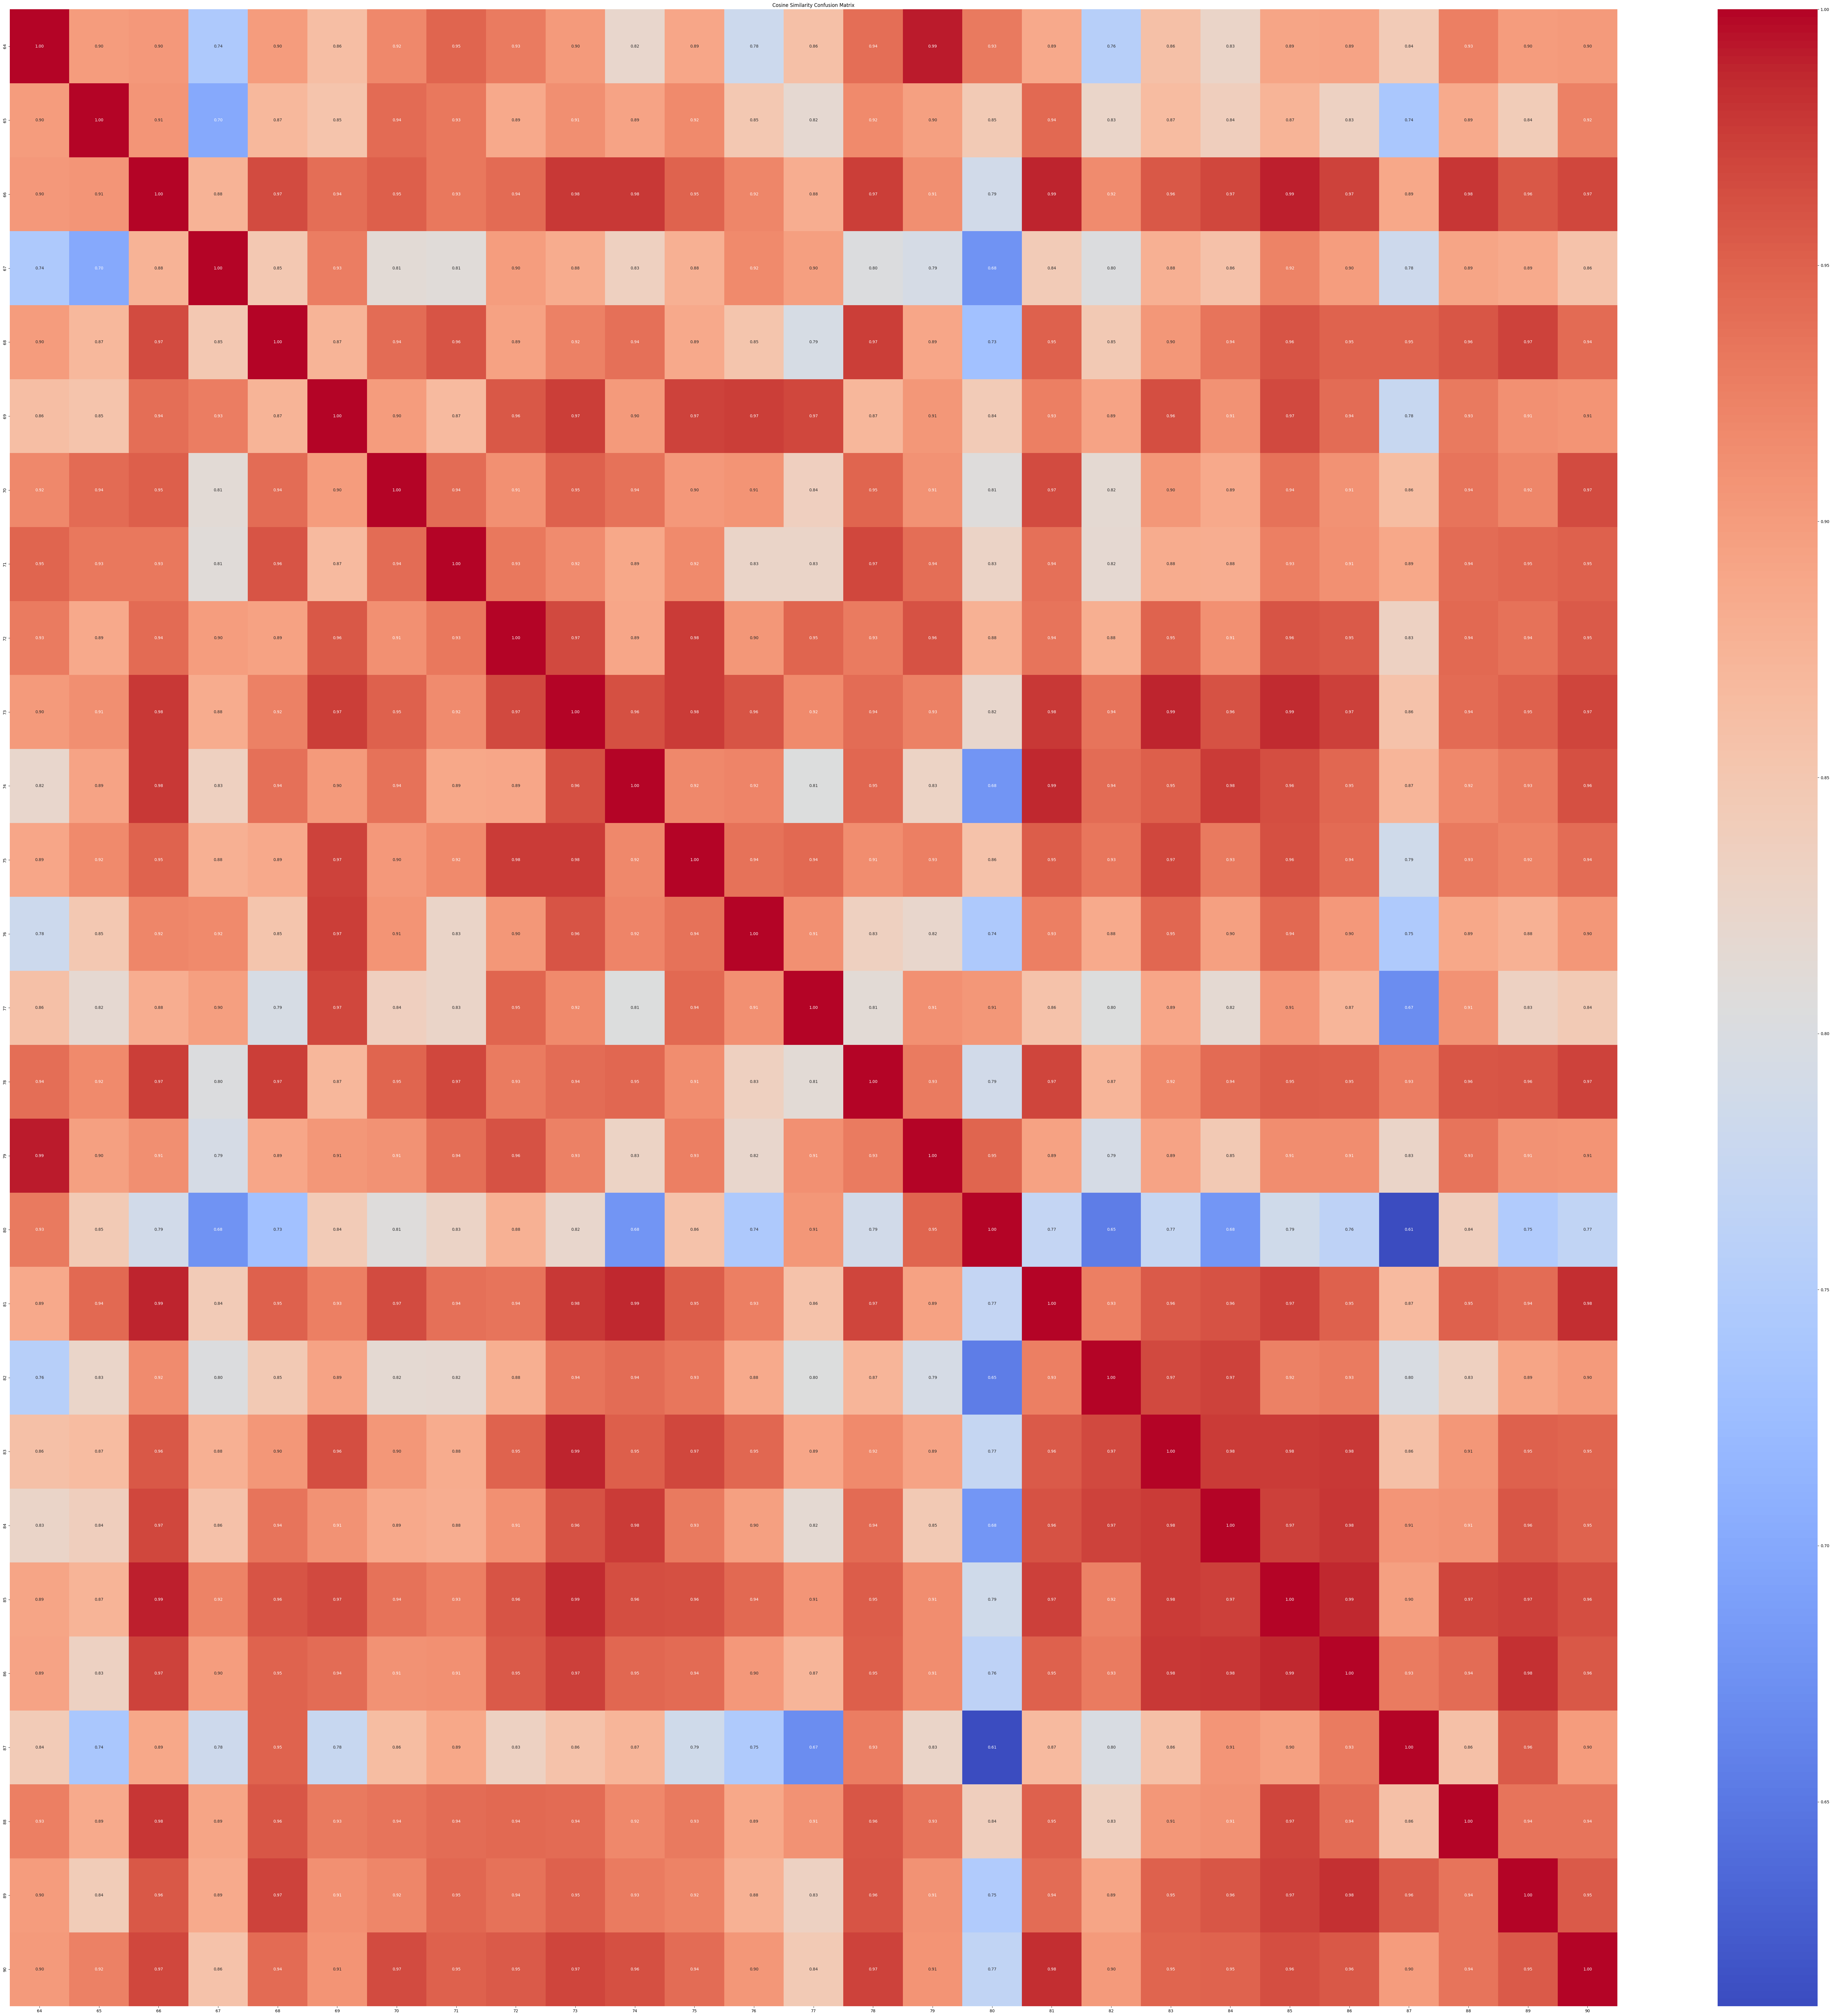

In [ ]:
plt.figure(figsize=(90, 90))
sns.heatmap(cosine_sim_df_bha, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cosine Similarity Confusion Matrix')
plt.show()

### **Euclidean Distance for Bhairavi**

In [ ]:
indices = df_bha.index
distance_matrix = pairwise_distances(df_bha.values, metric='euclidean')
distance_df_bha = pd.DataFrame(distance_matrix, index=indices, columns=indices)
print(distance_df_bha)

           64         65         66         67         68         69  \
64   0.000000  19.849433  15.198684  21.954498  14.387495  16.941074   
65  19.849433   0.000000  23.895606  31.176915  22.338308  25.514702   
66  15.198684  23.895606   0.000000  12.609520  10.198039   8.485281   
67  21.954498  31.176915  12.609520   0.000000  16.522712   9.746794   
68  14.387495  22.338308  10.198039  16.522712   0.000000  15.297059   
69  16.941074  25.514702   8.485281   9.746794  15.297059   0.000000   
70  19.949937  15.033296  23.769729  28.495614  19.157244  25.357445   
71  14.594520  24.919872   8.717798  15.264338  12.569805  12.489996   
72  12.288206  20.856654  12.884099  14.662878  14.764823  11.401754   
73  49.919936  41.904654  54.286278  55.731499  50.009999  53.376025   
74  21.071308  19.544820  14.317821  20.784610  13.152946  17.860571   
75  17.578396  17.349352  17.378147  19.824228  17.944358  15.297059   
76  21.748563  23.216374  14.491377  13.892444  17.492856  10.39

### **Frequency Distribution of Bilaval**

In [ ]:
df_bil=df[df['Raag'] == 'Alheyabilaval']

In [ ]:
df_bil.head()

Composition_name  Sa(dot below)  Re1(dot below)  Re(dot below)  \
31  AlheyaBilaval_01_76.csv              0               0              0   
32  AlheyaBilaval_02_76.csv              0               0              0   
33  AlheyaBilaval_03_77.csv              0               0              0   
34  AlheyaBilaval_04_79.csv              0               0              0   
35  AlheyaBilaval_05_80.csv              0               0              0   

    Ga1(dot below)  Ga(dot below)  Ma(dot below)  Ma2(dot below)  \
31               0              0              0               0   
32               0              0              0               0   
33               0              0              0               0   
34               0              0              0               0   
35               0              0              0               0   

    Pa(dot below)  Dha1(dot below)  ...  Ga1(dot above)  Ga(dot above)  \
31              0                0  ...               0              3   
32              0                0  ...               0              6   
33              0                0  ...               0              7   
34              0                0  ...               0              9   
35              0                0  ...               0              8   

    Ma(dot above)  Ma2(dot above)  Pa(dot above)  Dha1(dot above)  \
31              3               0              1                0   
32              5               0              1                0   
33              5               0              1                0   
34              9               0              4                0   
35              5               0              1                0   

    Dha(dot above)  Ni1(dot above)  Ni(dot above)           Raag  
31               0               0              0  Alheyabilaval  
32               0               0              0  Alheyabilaval  
33               0               0              0  Alheyabilaval  
34               0               0              0  Alheyabilaval  
35               0               0              0  Alheyabilaval  

[5 rows x 38 columns]

In [ ]:
df_bil = df_bil.drop(columns = ['Composition_name','Raag'])

In [ ]:
df_bil['Sa'] = df_bil['Sa(dot below)']+df_bil['Sa(no dot)'] + df_bil['Sa(dot above)']
df_bil['Re1'] = df_bil['Re1(dot below)']+df_bil['Re1(no dot)'] + df_bil['Re1(dot above)']
df_bil['Re'] = df_bil['Re(dot below)']+df_bil['Re(no dot)'] + df_bil['Re(dot above)']
df_bil['Ga1'] = df_bil['Ga1(dot below)']+df_bil['Ga1(no dot)'] + df_bil['Ga1(dot above)']
df_bil['Ga'] = df_bil['Ga(dot below)']+df_bil['Ga(no dot)'] + df_bil['Ga(dot above)']
df_bil['Ma'] = df_bil['Ma(dot below)']+df_bil['Ma(no dot)'] + df_bil['Ma(dot above)']
df_bil['Ma2'] = df_bil['Ma2(dot below)']+df_bil['Ma2(no dot)'] + df_bil['Ma2(dot above)']
df_bil['Pa'] = df_bil['Pa(dot below)']+df_bil['Pa(no dot)'] + df_bil['Pa(dot above)']
df_bil['Dha1'] = df_bil['Dha1(dot below)']+df_bil['Dha1(no dot)'] + df_bil['Dha1(dot above)']
df_bil['Dha'] = df_bil['Dha(dot below)']+df_bil['Dha(no dot)'] + df_bil['Dha(dot above)']
df_bil['Ni1'] = df_bil['Ni1(dot below)']+df_bil['Ni1(no dot)'] + df_bil['Ni1(dot above)']
df_bil['Ni'] = df_bil['Ni(dot below)']+df_bil['Ni(no dot)'] + df_bil['Ni(dot above)']

In [ ]:
df_bil = df_bil.drop(df_bil.iloc[:,0:36],axis = 1)

In [ ]:
df_bil.head()

Sa  Re1  Re  Ga1  Ga  Ma  Ma2  Pa  Dha1  Dha  Ni1  Ni
31  17    0  12    0  11  11    0  10     0   10    0   6
32  21    0   9    0  14   9    0   8     0   10    0  17
33  27    0   9    0  16  16    0  15     0   13    2  20
34  44    0  14    0  18  23    0  17     0   20    6  30
35  27    0  14    0  18  11    0  10     0    6    1   8

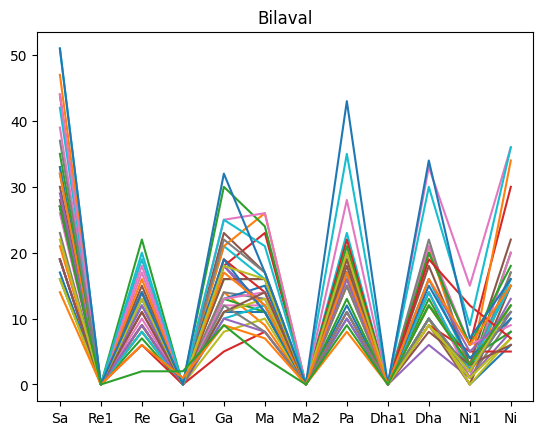

In [ ]:
bars = ['Sa','Re1','Re','Ga1','Ga','Ma','Ma2','Pa','Dha1','Dha','Ni1','Ni']
plt.xticks(range(len(bars)), bars)
plt.title('Bilaval')
for i in range(len(df_bil)):
  plt.plot(df_bil.iloc[i])

### **Cosine Similarity for Bilaval**

In [ ]:
cosine_matrix_bil = cosine_similarity(df_bil)

In [ ]:
cosine_sim_df_bil = pd.DataFrame(cosine_matrix_bil, index=df_bil.index, columns=df_bil.index)

In [ ]:
print(cosine_sim_df_bil)

          31        32        33        34        35        36        37  \
31  1.000000  0.936351  0.949112  0.935433  0.964625  0.973469  0.944826   
32  0.936351  1.000000  0.985770  0.980253  0.941204  0.964187  0.966515   
33  0.949112  0.985770  1.000000  0.990656  0.936453  0.972209  0.964208   
34  0.935433  0.980253  0.990656  1.000000  0.927855  0.947487  0.977664   
35  0.964625  0.941204  0.936453  0.927855  1.000000  0.979683  0.949667   
36  0.973469  0.964187  0.972209  0.947487  0.979683  1.000000  0.943081   
37  0.944826  0.966515  0.964208  0.977664  0.949667  0.943081  1.000000   
38  0.967597  0.931816  0.955871  0.946800  0.967594  0.968198  0.969400   
39  0.929138  0.899248  0.922285  0.932630  0.938300  0.915971  0.967652   
40  0.977760  0.953064  0.965804  0.959845  0.978236  0.975717  0.978505   
41  0.973738  0.960166  0.987399  0.971272  0.947192  0.981565  0.942275   
42  0.939773  0.986490  0.993785  0.997532  0.930806  0.955964  0.976764   
43  0.967620

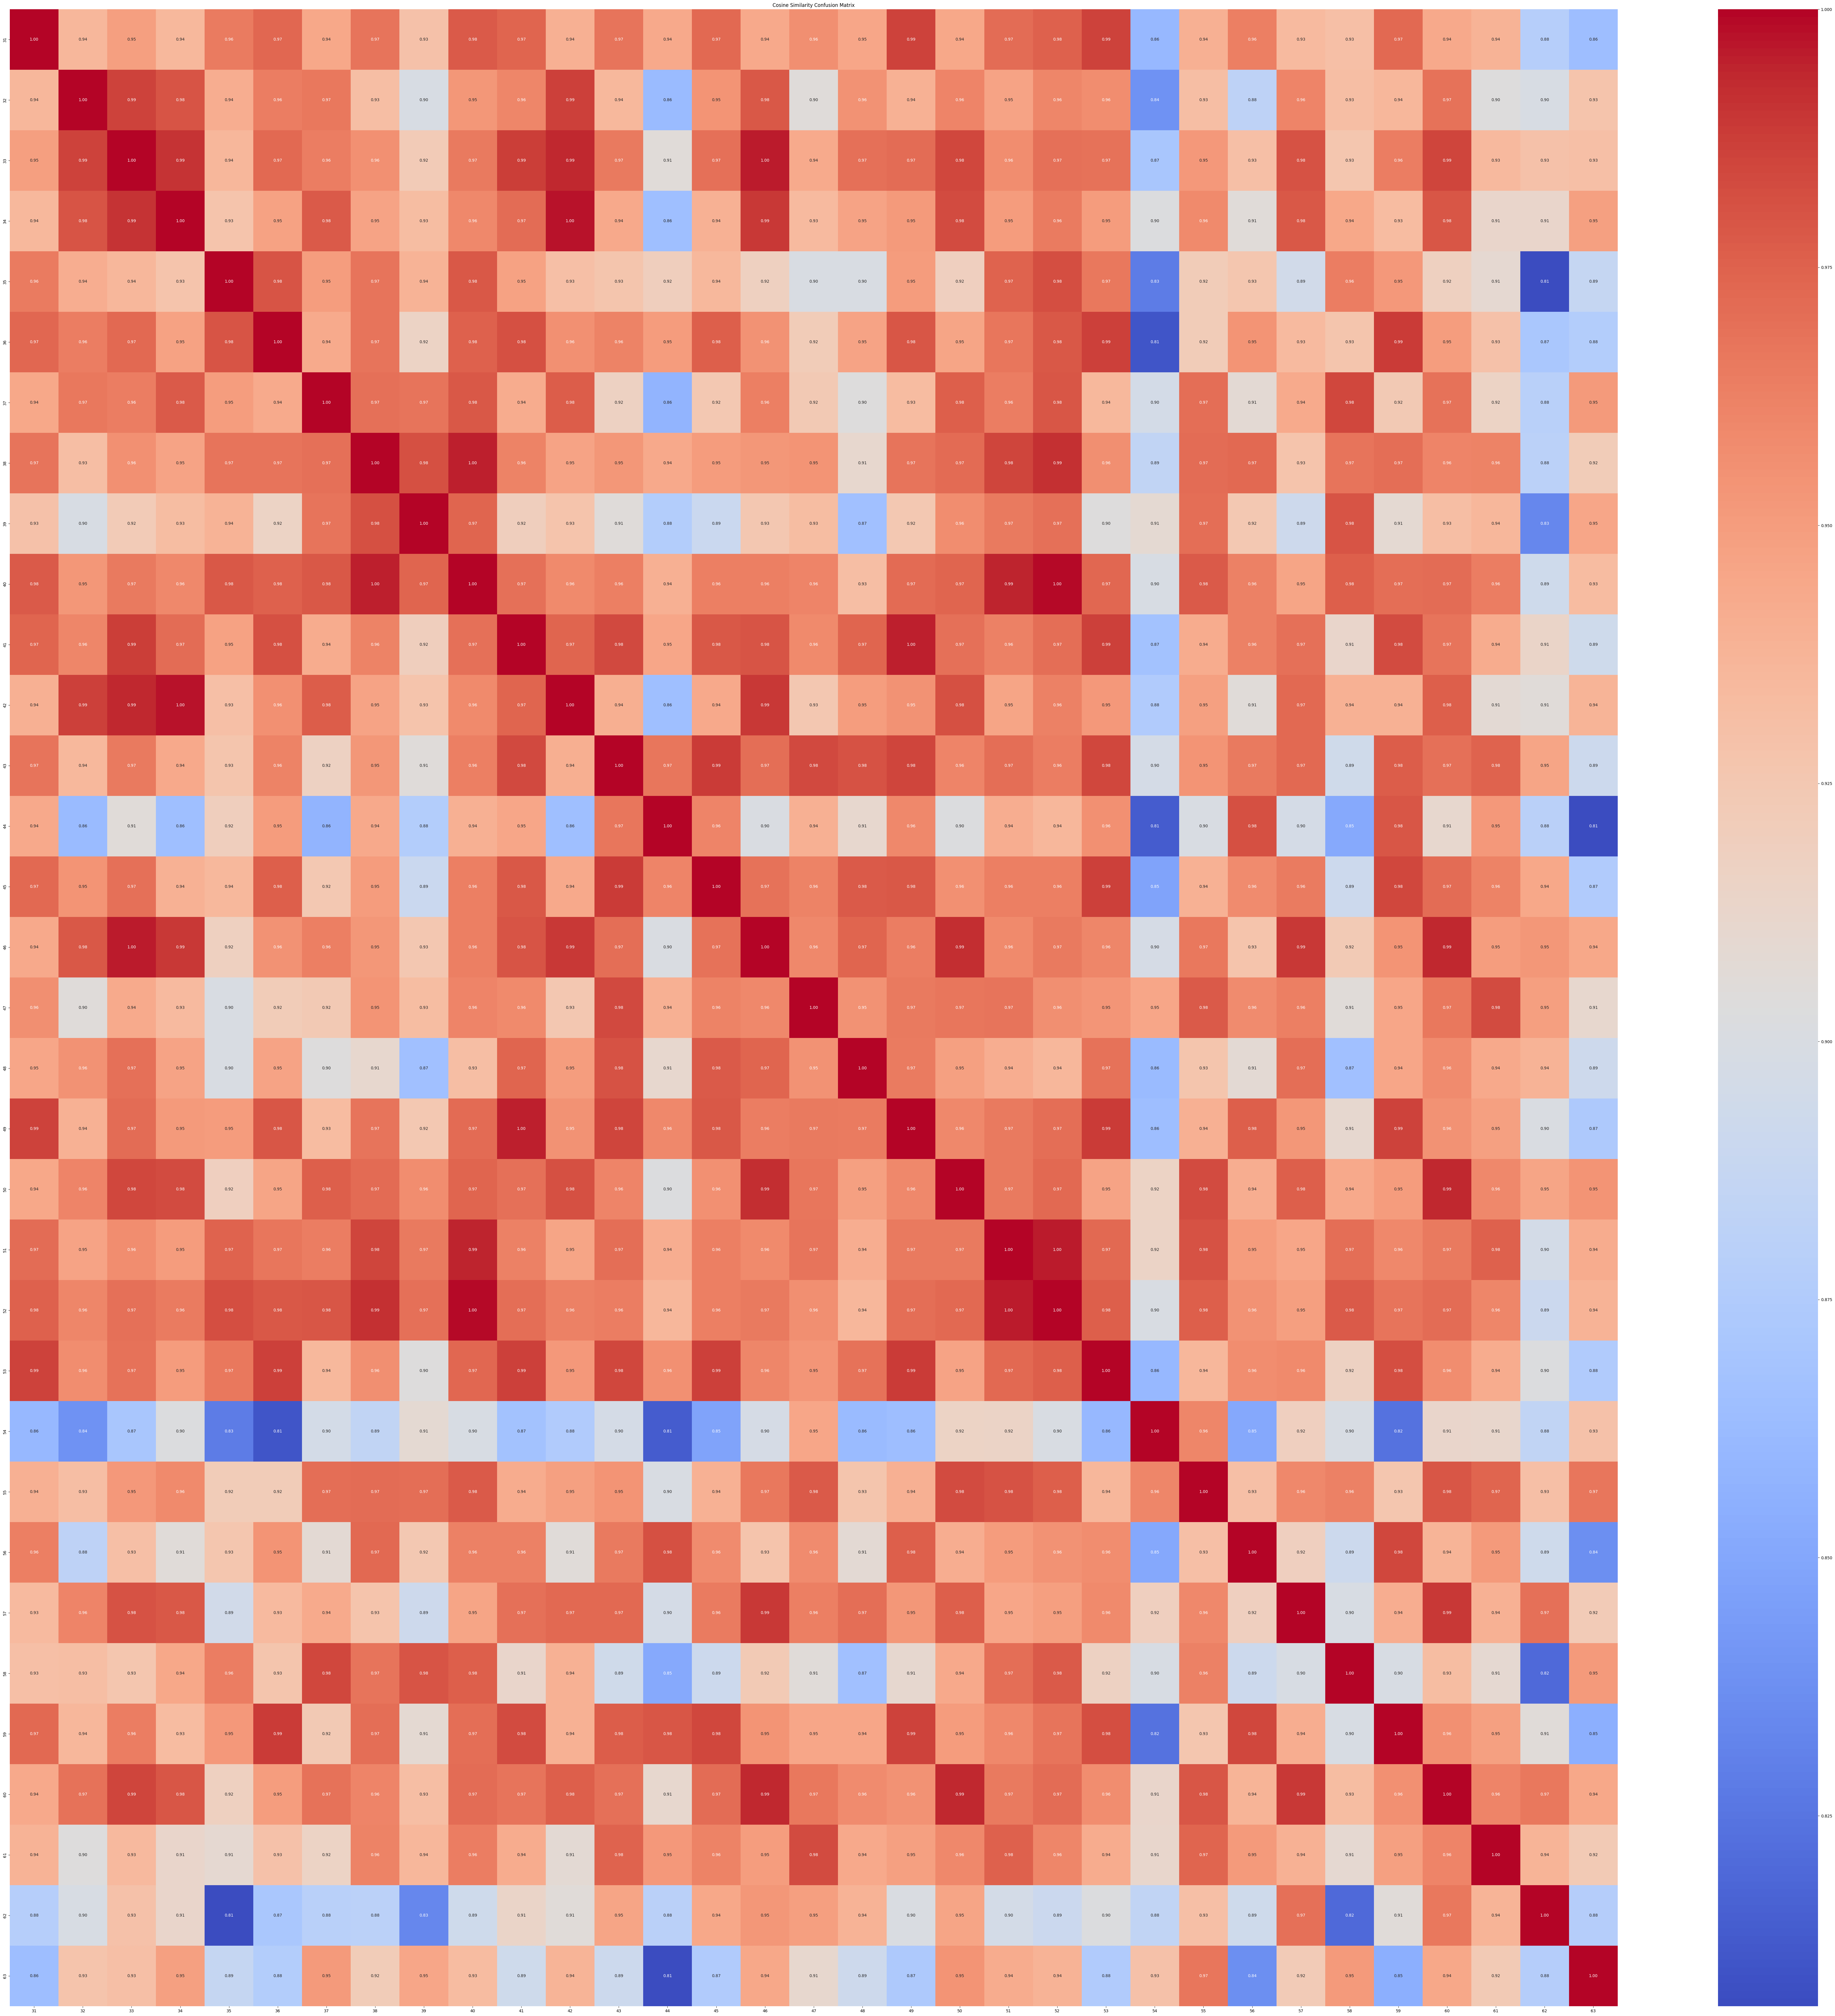

In [ ]:
plt.figure(figsize=(90, 90))
sns.heatmap(cosine_sim_df_bil, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cosine Similarity Confusion Matrix')
plt.show()

### **Euclidean Distance for Bilaval**

In [ ]:
indices = df_bil.index
distance_matrix = pairwise_distances(df_bil.values, metric='euclidean')
distance_df_bil = pd.DataFrame(distance_matrix, index=indices, columns=indices)
print(distance_df_bil)

           31         32         33         34         35         36  \
31   0.000000  12.767145  19.824228  41.073106  13.190906  21.000000   
32  12.767145   0.000000  12.649111  33.941125  13.527749  17.776389   
33  19.824228  12.649111   0.000000  23.151674  16.522712  11.661904   
34  41.073106  33.941125  23.151674   0.000000  34.452866  26.457513   
35  13.190906  13.527749  16.522712  34.452866   0.000000  13.076697   
36  21.000000  17.776389  11.661904  26.457513  13.076697   0.000000   
37  27.367864  21.817424  15.556349  18.867962  20.566964  18.055470   
38  18.867962  18.627936  13.747727  28.195744  12.884099  12.369317   
39  17.349352  18.165902  17.832555  32.924155  14.317821  20.099751   
40  33.075671  30.215890  21.189620  19.313208  24.617067  17.635192   
41   8.544004   9.899495  13.190906  35.383612  13.076697  16.733201   
42  47.233463  39.974992  29.154759   8.246211  40.261644  30.983867   
43   7.937254  12.649111  17.663522  39.623226  15.779734  20.83

### **Frequency Distribution of Marva**

In [ ]:
df_mar=df[df['Raag'] == 'Marva']

In [ ]:
df_mar.head()

Composition_name  Sa(dot below)  Re1(dot below)  Re(dot below)  \
91  Marva_01_283.csv              0               0              0   
92  Marva_02_283.csv              0               0              0   
93  Marva_03_284.csv              0               0              0   
94  Marva_04_286.csv              0               0              0   
95  Marva_05_287.csv              0               0              0   

    Ga1(dot below)  Ga(dot below)  Ma(dot below)  Ma2(dot below)  \
91               0              0              0               1   
92               0              0              0               1   
93               0              0              0               0   
94               0              0              0               0   
95               0              0              0               1   

    Pa(dot below)  Dha1(dot below)  ...  Ga1(dot above)  Ga(dot above)  \
91              0                0  ...               0              2   
92              0                0  ...               0              5   
93              0                0  ...               0              0   
94              0                0  ...               0              0   
95              0                0  ...               0              0   

    Ma(dot above)  Ma2(dot above)  Pa(dot above)  Dha1(dot above)  \
91              0               1              0                0   
92              0               3              0                0   
93              0               0              0                0   
94              0               0              0                0   
95              0               0              0                0   

    Dha(dot above)  Ni1(dot above)  Ni(dot above)   Raag  
91               0               0              0  Marva  
92               1               0              0  Marva  
93               0               0              0  Marva  
94               0               0              0  Marva  
95               0               0              0  Marva  

[5 rows x 38 columns]

In [ ]:
df_mar = df_mar.drop(columns = ['Composition_name','Raag'])

In [ ]:
df_mar['Sa'] = df_mar['Sa(dot below)']+df_mar['Sa(no dot)'] + df_mar['Sa(dot above)']
df_mar['Re1'] = df_mar['Re1(dot below)']+df_mar['Re1(no dot)'] + df_mar['Re1(dot above)']
df_mar['Re'] = df_mar['Re(dot below)']+df_mar['Re(no dot)'] + df_mar['Re(dot above)']
df_mar['Ga1'] = df_mar['Ga1(dot below)']+df_mar['Ga1(no dot)'] + df_mar['Ga1(dot above)']
df_mar['Ga'] = df_mar['Ga(dot below)']+df_mar['Ga(no dot)'] + df_mar['Ga(dot above)']
df_mar['Ma'] = df_mar['Ma(dot below)']+df_mar['Ma(no dot)'] + df_mar['Ma(dot above)']
df_mar['Ma2'] = df_mar['Ma2(dot below)']+df_mar['Ma2(no dot)'] + df_mar['Ma2(dot above)']
df_mar['Pa'] = df_mar['Pa(dot below)']+df_mar['Pa(no dot)'] + df_mar['Pa(dot above)']
df_mar['Dha1'] = df_mar['Dha1(dot below)']+df_mar['Dha1(no dot)'] + df_mar['Dha1(dot above)']
df_mar['Dha'] = df_mar['Dha(dot below)']+df_mar['Dha(no dot)'] + df_mar['Dha(dot above)']
df_mar['Ni1'] = df_mar['Ni1(dot below)']+df_mar['Ni1(no dot)'] + df_mar['Ni1(dot above)']
df_mar['Ni'] = df_mar['Ni(dot below)']+df_mar['Ni(no dot)'] + df_mar['Ni(dot above)']

In [ ]:
df_mar = df_mar.drop(df_mar.iloc[:,0:36],axis = 1)

In [ ]:
df_mar.head()

Sa  Re1  Re  Ga1  Ga  Ma  Ma2  Pa  Dha1  Dha  Ni1  Ni
91   6   11   0    0  12   0   12   0     0    8    0   8
92   2   22   0    0  21   0   20   0     0   20    0  16
93  17   27   0    0  16   0   12   0     0   13    0   6
94  17   15   0    0  24   0   18   0     0   20    0  13
95  27   14   0    0  20   0   18   0     0   23    7  19

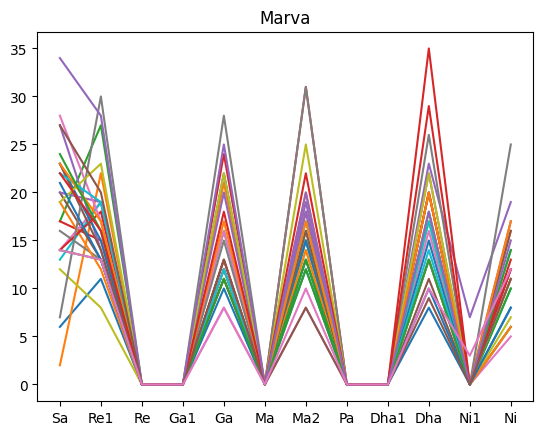

In [ ]:
bars = ['Sa','Re1','Re','Ga1','Ga','Ma','Ma2','Pa','Dha1','Dha','Ni1','Ni']
plt.xticks(range(len(bars)), bars)
plt.title('Marva')
for i in range(len(df_mar)):
  plt.plot(df_mar.iloc[i])

### **Cosine Similarity for Marva**

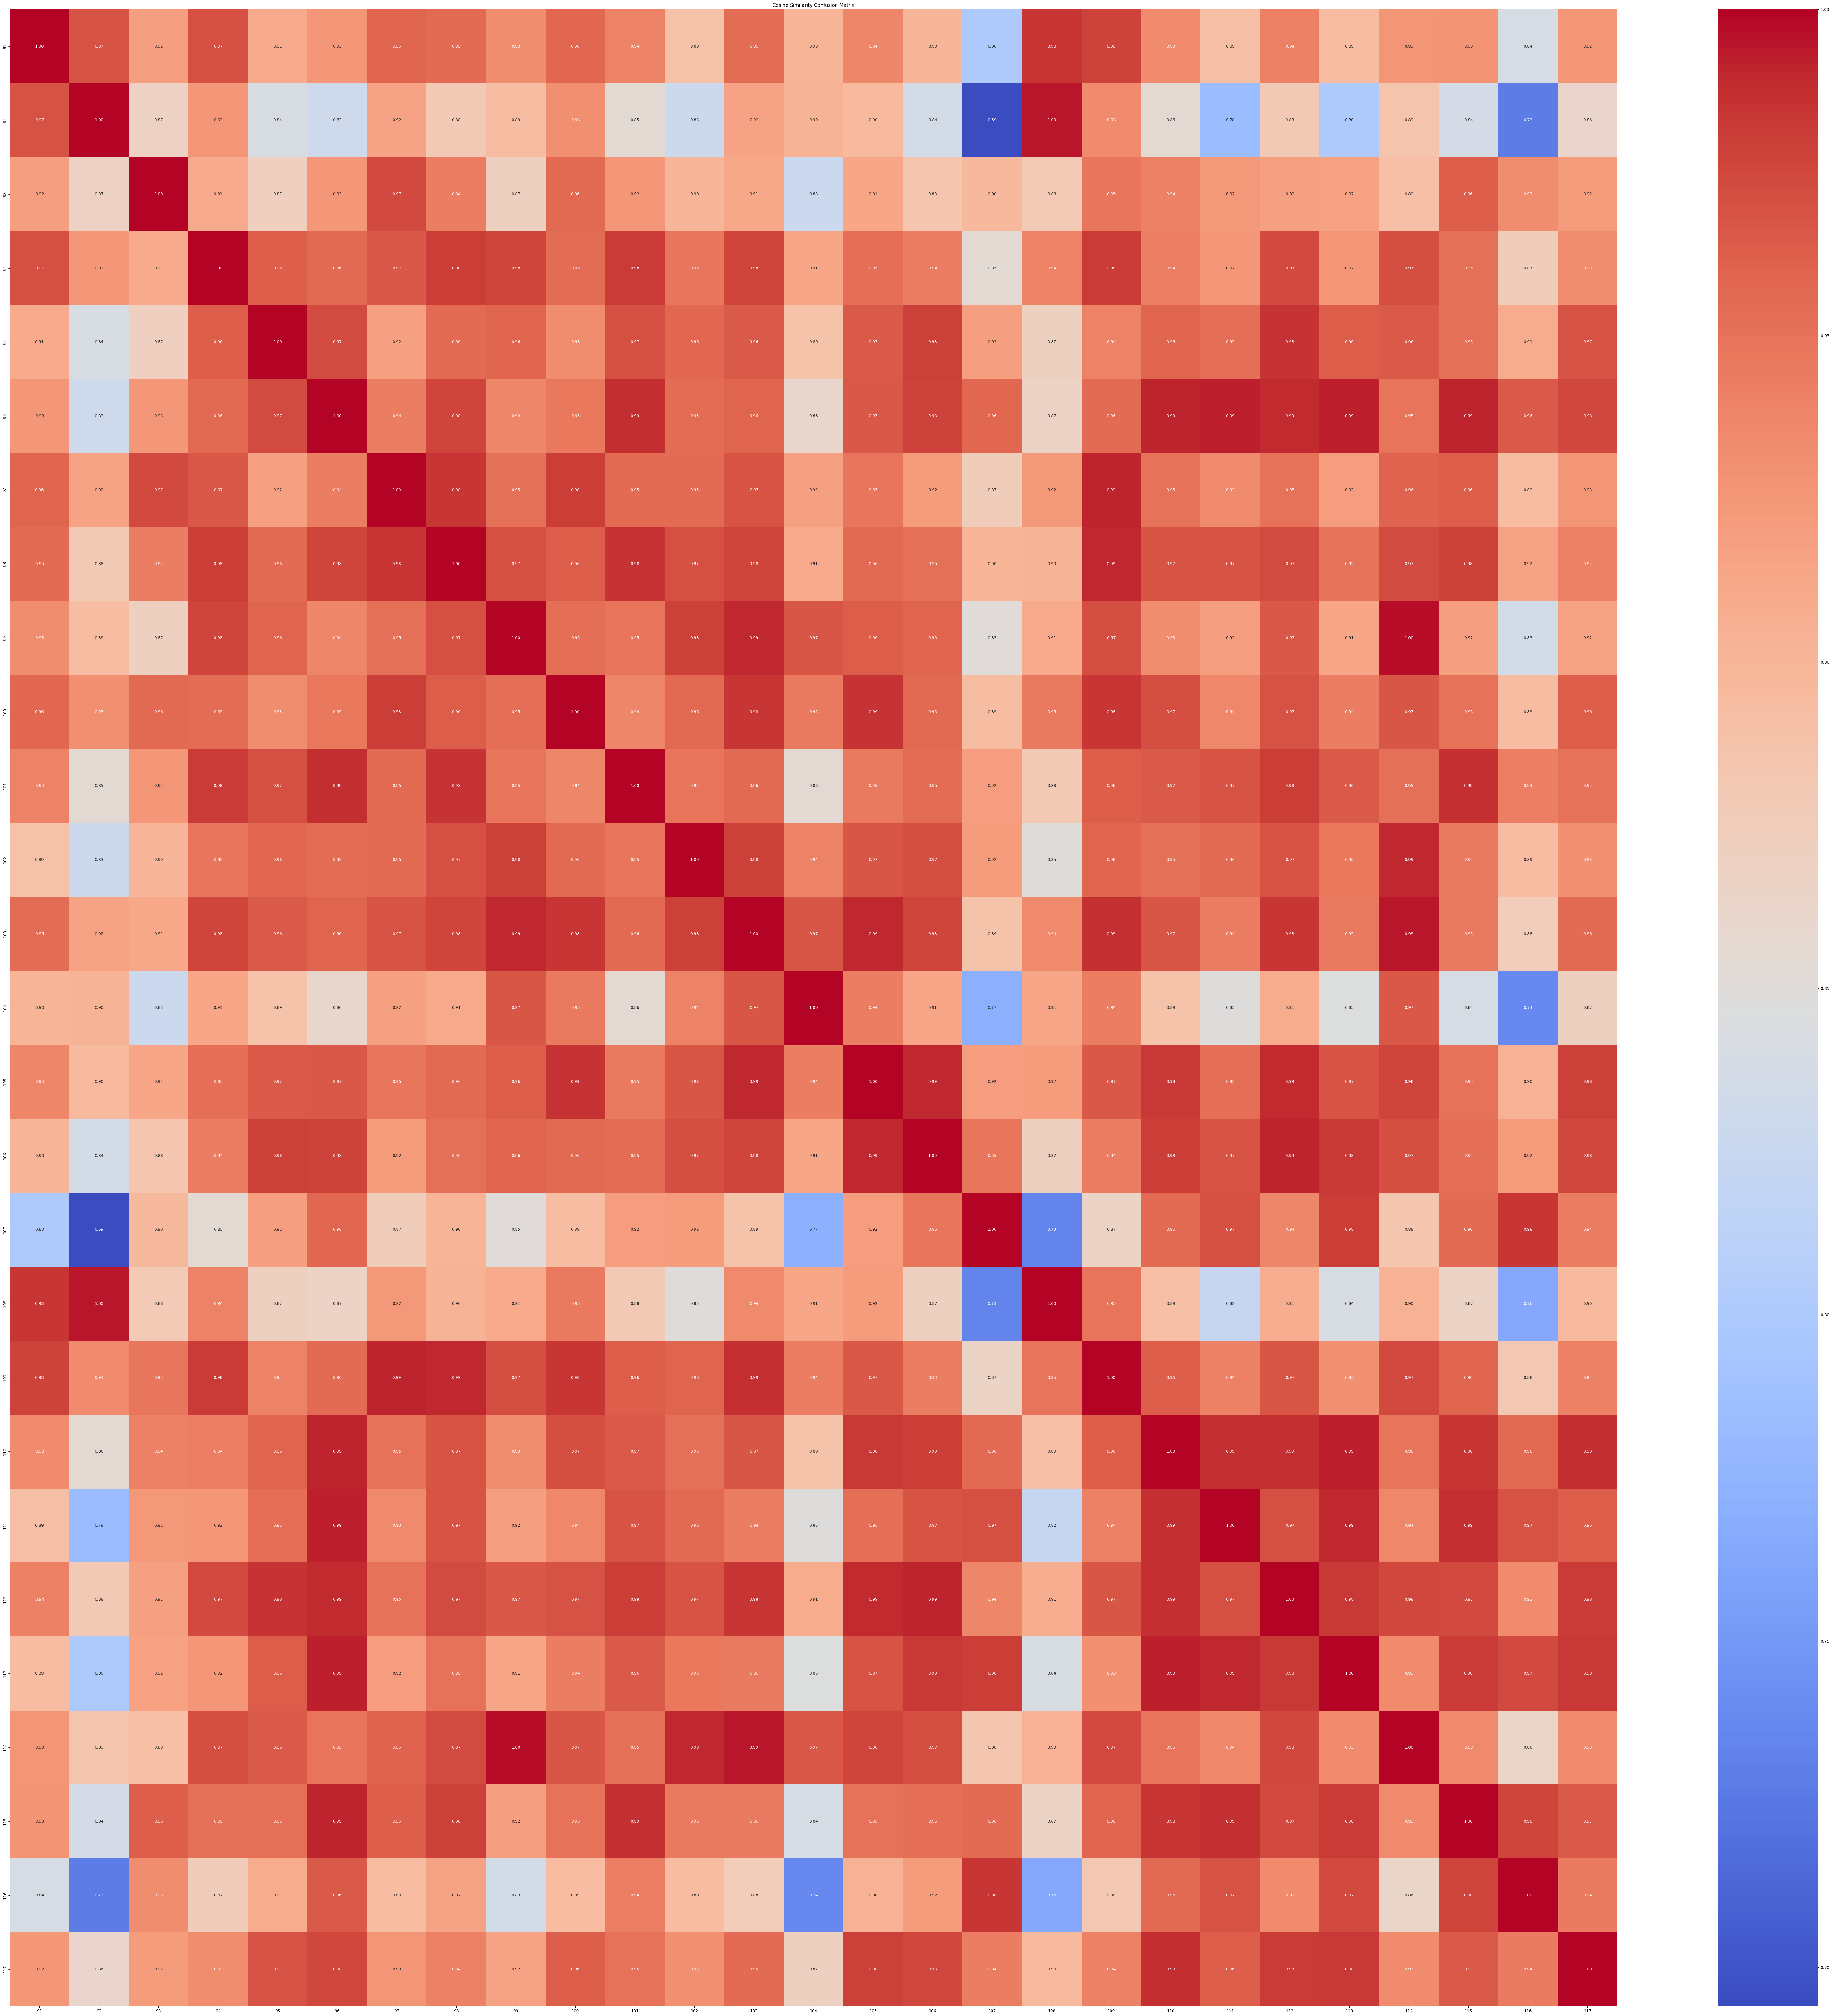

In [ ]:
plt.figure(figsize=(90, 90))
sns.heatmap(cosine_sim_df_mar, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cosine Similarity Confusion Matrix')
plt.show()

In [ ]:
cosine_matrix_mar = cosine_similarity(df_mar)

In [ ]:
cosine_sim_df_mar = pd.DataFrame(cosine_matrix_mar, index=df_mar.index, columns=df_mar.index)

In [ ]:
print(cosine_sim_df_mar)

          91        92        93        94        95        96        97   \
91   1.000000  0.969534  0.919787  0.970961  0.909872  0.925556  0.958176   
92   0.969534  1.000000  0.869131  0.925403  0.840931  0.831005  0.915895   
93   0.919787  0.869131  1.000000  0.909703  0.871445  0.925609  0.973942   
94   0.970961  0.925403  0.909703  1.000000  0.962306  0.956634  0.965822   
95   0.909872  0.840931  0.871445  0.962306  1.000000  0.973083  0.918496   
96   0.925556  0.831005  0.925609  0.956634  0.973083  1.000000  0.943083   
97   0.958176  0.915895  0.973942  0.965822  0.918496  0.943083  1.000000   
98   0.954664  0.880361  0.942635  0.980570  0.955236  0.976691  0.983635   
99   0.931910  0.892801  0.869778  0.976993  0.958887  0.937593  0.951867   
100  0.957271  0.930822  0.956826  0.953389  0.932921  0.947242  0.980090   
101  0.939910  0.854761  0.924994  0.981110  0.970868  0.987696  0.954660   
102  0.888083  0.828360  0.900698  0.947807  0.957128  0.954032  0.954866   

### **Euclidean Distance for Marva**

In [ ]:
indices = df_mar.index
distance_matrix = pairwise_distances(df_mar.values, metric='euclidean')
distance_df_mar = pd.DataFrame(distance_matrix, index=indices, columns=indices)
print(distance_df_mar)

           91         92         93         94         95         96   \
91    0.000000  22.135944  20.542639  22.045408  30.740852  14.832397   
92   22.135944   0.000000  22.090722  17.204651  27.586228  24.979992   
93   20.542639  22.090722   0.000000  18.493242  25.278449  15.620499   
94   22.045408  17.204651  18.493242   0.000000  14.525839  15.620499   
95   30.740852  27.586228  25.278449  14.525839   0.000000  19.519221   
96   14.832397  24.979992  15.620499  15.620499  19.519221   0.000000   
97   15.033296  18.439089   9.591663  13.341664  22.649503  12.083046   
98   12.288206  22.068076  14.387495  13.892444  21.771541   7.280110   
99   11.445523  22.427661  20.566964  16.703293  23.874673  11.958261   
100  14.422205  17.320508  12.083046  15.099669  21.840330  11.401754   
101  21.886069  23.600847  16.278821   8.660254  13.856406  10.723805   
102  17.972201  25.000000  17.521415  15.716234  19.798990  10.630146   
103  13.711309  19.026298  16.673332  13.190906  19